# Import Libraries

In [218]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from datetime import date

# Import Data

In [208]:
df = pd.read_csv('./data/sidewalk_cafe_inspections.csv').drop(['Unnamed: 0'], axis=1)

In [6]:
df.head()

,CAMIS,DBA,BORO,ZIPCODE,FLAG__Critical,FLAG__Not Critical,SCORE,GRADE,LIC_STATUS,SWC_SQ_FT,...,ZIP_11249,ZIP_11366,ZIP_11368,ZIP_11375,ZIP_11421,ZIP_11432,BRONX,BROOKLYN,MANHATTAN,QUEENS
0,40364958,WHITE HORSE TAVERN,MANHATTAN,10014,22,11,19.437500,1,Active,728.0,...,0,0,0,0,0,0,0,0,1,0
1,40366473,TIO PEPE,MANHATTAN,10014,2,5,9.333333,1,Active,129.0,...,0,0,0,0,0,0,0,0,1,0
2,40370856,OLIVE TREE CAFE & COMEDY CELLAR,MANHATTAN,10012,1,4,5.666667,1,Active,46.0,...,0,0,0,0,0,0,0,0,1,0
3,40372262,LA RIPAILLE RESTAURANT,MANHATTAN,10014,8,5,13.600000,1,Active,129.0,...,0,0,0,0,0,0,0,0,1,0
4,40373912,THE MALT HOUSE,MANHATTAN,10012,8,10,18.000000,1,Active,193.0,...,0,0,0,0,0,0,0,0,1,0


In [7]:
df.shape

(435, 123)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Columns: 123 entries, CAMIS to QUEENS
dtypes: float64(6), int64(112), object(5)
memory usage: 418.1+ KB


# EDA

#### Class Imbalance Evaluation

In [10]:
# view value_counts of Grade column (1 = received an A, 0 = did not receive an A)
df.GRADE.value_counts()

1    424
0     11
Name: GRADE, dtype: int64

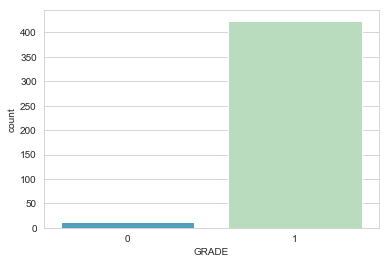

In [11]:
# visualize value counts of target column
sns.set_style('whitegrid')
sns.countplot(x='GRADE',data=df,palette='GnBu_r')

#### Outlier Evaluation

In [12]:
df.describe()

,CAMIS,ZIPCODE,FLAG__Critical,FLAG__Not Critical,SCORE,GRADE,SWC_SQ_FT,SWC_TABLES,SWC_CHAIRS,COMMUNITY_DISTRICT,...,ZIP_11249,ZIP_11366,ZIP_11368,ZIP_11375,ZIP_11421,ZIP_11432,BRONX,BROOKLYN,MANHATTAN,QUEENS
count,4.350000e+02,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,...,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000
mean,4.580712e+07,10288.760920,9.126437,7.291954,14.398551,0.974713,240.972414,9.783908,22.071264,158.411494,...,0.009195,0.002299,0.002299,0.013793,0.002299,0.002299,0.016092,0.135632,0.765517,0.082759
std,4.418490e+06,490.330715,5.940963,4.287997,5.607098,0.157177,159.080130,6.728728,14.604683,100.312982,...,0.095561,0.047946,0.047946,0.116766,0.047946,0.047946,0.125974,0.342792,0.424163,0.275834
min,4.036496e+07,10001.000000,1.000000,0.000000,4.666667,0.000000,23.000000,1.000000,3.000000,101.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.140928e+07,10012.000000,5.000000,4.000000,10.633333,1.000000,131.000000,5.000000,12.000000,103.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,5.000075e+07,10024.000000,8.000000,7.000000,13.469388,1.000000,195.000000,8.000000,18.000000,107.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,5.005042e+07,10128.000000,13.000000,10.000000,17.291667,1.000000,305.000000,12.000000,28.000000,112.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,5.008981e+07,11432.000000,34.000000,25.000000,42.000000,1.000000,1253.000000,52.000000,104.000000,412.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


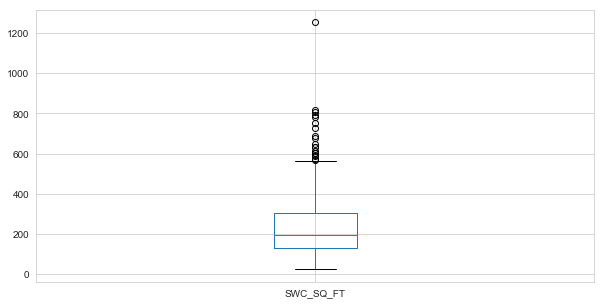

In [39]:
# Boxplot of SWC_SQ_FT to look at outliers visually
plt.figure(figsize=(10,5))
df.boxplot(column=['SWC_SQ_FT'])

In [40]:
# check the value counts of target variable for the outliers in SWC_SQ_FT
df[df.SWC_SQ_FT >=570].GRADE.value_counts()

1    19
Name: GRADE, dtype: int64

In [80]:
df = df[df.SWC_SQ_FT<525]

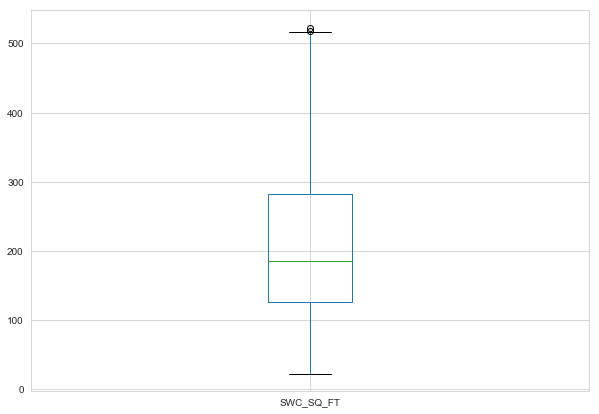

In [81]:
# Boxplot of SWC_SQ_FT to look at outliers visually again after dropping outliers
plt.figure(figsize=(10,7))
df.boxplot(column=['SWC_SQ_FT'])

In [82]:
df.describe()

,CAMIS,ZIPCODE,FLAG__Critical,FLAG__Not Critical,SCORE,GRADE,SWC_SQ_FT,SWC_TABLES,SWC_CHAIRS,COMMUNITY_DISTRICT,...,ZIP_11249,ZIP_11366,ZIP_11368,ZIP_11375,ZIP_11421,ZIP_11432,BRONX,BROOKLYN,MANHATTAN,QUEENS
count,4.070000e+02,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,...,407.000000,407.000000,407.0,407.000000,407.000000,407.0,407.000000,407.000000,407.000000,407.00000
mean,4.588307e+07,10282.203931,9.117936,7.309582,14.329610,0.972973,212.631450,8.727273,19.712531,156.434889,...,0.009828,0.002457,0.0,0.014742,0.002457,0.0,0.014742,0.140049,0.771499,0.07371
std,4.415497e+06,486.749402,5.932365,4.338223,5.595273,0.162362,114.383233,4.996237,11.004630,98.078485,...,0.098769,0.049568,0.0,0.120667,0.049568,0.0,0.120667,0.347465,0.420384,0.26162
min,4.036647e+07,10001.000000,1.000000,0.000000,4.666667,0.000000,23.000000,1.000000,3.000000,101.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000
25%,4.141009e+07,10012.000000,5.000000,4.000000,10.500000,1.000000,126.500000,5.000000,12.000000,103.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.00000
50%,5.000116e+07,10024.000000,8.000000,7.000000,13.375000,1.000000,186.000000,8.000000,17.000000,107.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.00000
75%,5.005042e+07,10075.000000,13.000000,10.000000,17.250000,1.000000,283.000000,11.000000,26.000000,112.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.00000
max,5.008981e+07,11421.000000,34.000000,25.000000,42.000000,1.000000,523.000000,30.000000,64.000000,409.000000,...,1.000000,1.000000,0.0,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.00000


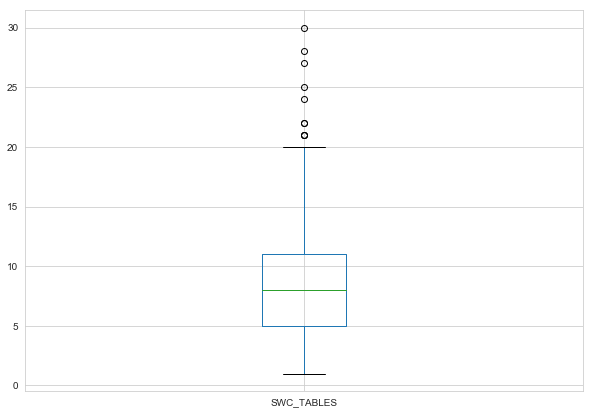

In [83]:
# Boxplot of SWC_SQ_FT to look at outliers visually again after dropping outliers
plt.figure(figsize=(10,7))
df.boxplot(column=['SWC_TABLES'])

In [86]:
# check value counts of Grade for the restaurants with outlier SWC TABLE counts
df[df['SWC_TABLES']>20].GRADE.value_counts()

1    10
Name: GRADE, dtype: int64

In [87]:
# drop outliers
df = df[df['SWC_TABLES']<=20]

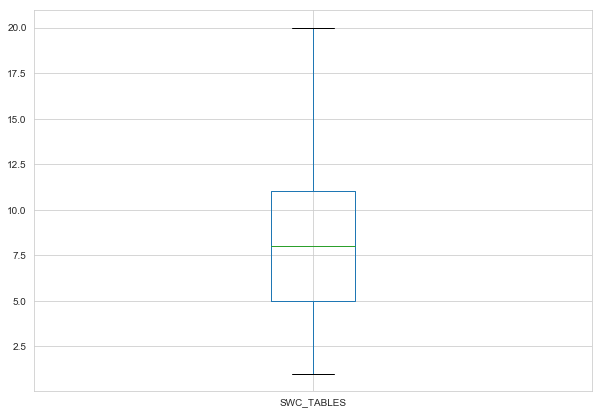

In [88]:
# Boxplot of SWC_SQ_FT to look at outliers visually again after dropping outliers
plt.figure(figsize=(10,7))
df.boxplot(column=['SWC_TABLES'])

In [89]:
df.describe()

,CAMIS,ZIPCODE,FLAG__Critical,FLAG__Not Critical,SCORE,GRADE,SWC_SQ_FT,SWC_TABLES,SWC_CHAIRS,COMMUNITY_DISTRICT,...,ZIP_11249,ZIP_11366,ZIP_11368,ZIP_11375,ZIP_11421,ZIP_11432,BRONX,BROOKLYN,MANHATTAN,QUEENS
count,3.970000e+02,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,...,397.000000,397.000000,397.0,397.000000,397.000000,397.0,397.000000,397.000000,397.000000,397.000000
mean,4.595819e+07,10279.443325,9.133501,7.307305,14.386275,0.972292,206.400504,8.340050,18.952141,155.962217,...,0.010076,0.002519,0.0,0.012594,0.002519,0.0,0.015113,0.138539,0.773300,0.073048
std,4.408222e+06,484.049892,5.947566,4.366571,5.640947,0.164341,108.559988,4.385206,9.959272,97.711832,...,0.099996,0.050189,0.0,0.111657,0.050189,0.0,0.122158,0.345901,0.419225,0.260543
min,4.036647e+07,10001.000000,1.000000,0.000000,4.666667,0.000000,23.000000,1.000000,3.000000,101.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,4.142270e+07,10012.000000,5.000000,4.000000,10.500000,1.000000,126.000000,5.000000,12.000000,103.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000
50%,5.000155e+07,10024.000000,8.000000,7.000000,13.469388,1.000000,183.000000,8.000000,16.000000,107.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000
75%,5.005214e+07,10075.000000,13.000000,10.000000,17.333333,1.000000,277.000000,11.000000,24.000000,112.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000
max,5.008981e+07,11421.000000,34.000000,25.000000,42.000000,1.000000,518.000000,20.000000,56.000000,409.000000,...,1.000000,1.000000,0.0,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


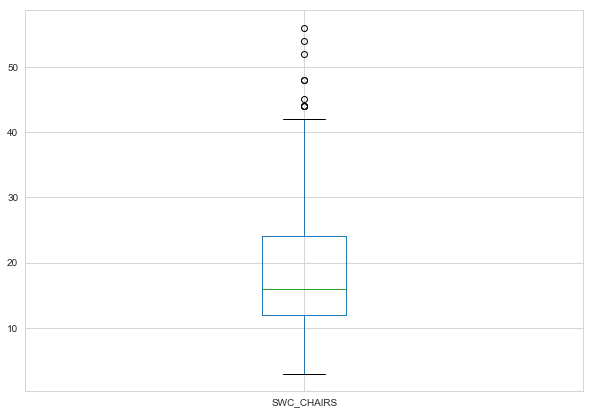

In [90]:
# Boxplot of SWC_CHAIRS to look at outliers visually
plt.figure(figsize=(10,7))
df.boxplot(column=['SWC_CHAIRS'])

In [95]:
# check value counts of Grade for the restaurants with outlier SWC CHAIRS counts
df[df['SWC_CHAIRS']>=45].GRADE.value_counts()

1    5
0    1
Name: GRADE, dtype: int64

In [96]:
# drop rows where the # of SWC Chairs are outliers
df = df[df['SWC_CHAIRS']<45]

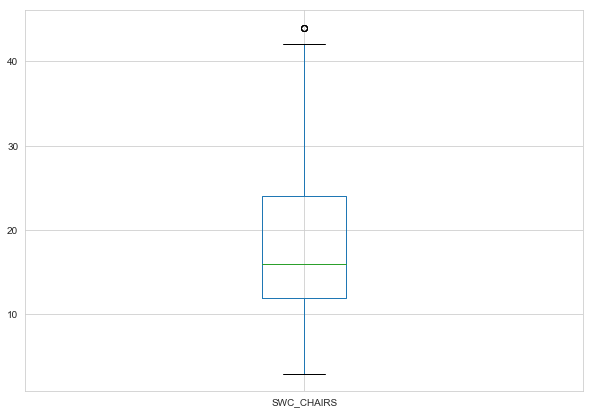

In [97]:
# Boxplot of SWC_CHAIRS to look at outliers visually after dropping outliers in SWC Chairs
plt.figure(figsize=(10,7))
df.boxplot(column=['SWC_CHAIRS'])

In [98]:
df.shape

(391, 123)

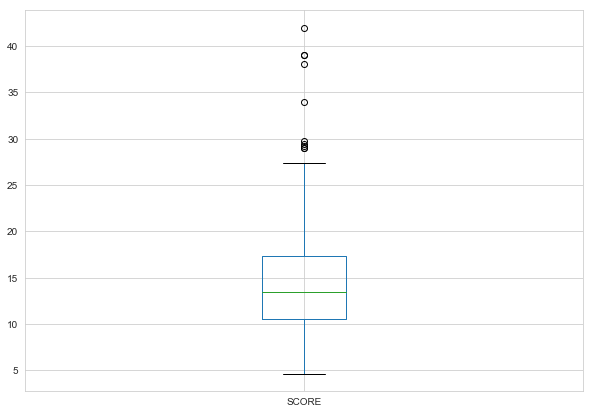

In [99]:
# Boxplot of SWC_CHAIRS to look at outliers visually
plt.figure(figsize=(10,7))
df.boxplot(column=['SCORE'])

In [109]:
# look at target column value counts for the outliers
df[df.SCORE >= 28].GRADE.value_counts()

1    5
0    5
Name: GRADE, dtype: int64

In [110]:
# drop outliers
df = df[df.SCORE < 28]

In [111]:
df.shape

(381, 123)

In [112]:
df.describe()

,CAMIS,ZIPCODE,FLAG__Critical,FLAG__Not Critical,SCORE,GRADE,SWC_SQ_FT,SWC_TABLES,SWC_CHAIRS,COMMUNITY_DISTRICT,...,ZIP_11249,ZIP_11366,ZIP_11368,ZIP_11375,ZIP_11421,ZIP_11432,BRONX,BROOKLYN,MANHATTAN,QUEENS
count,3.810000e+02,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,...,381.000000,381.000000,381.0,381.000000,381.000000,381.0,381.000000,381.000000,381.000000,381.000000
mean,4.587950e+07,10287.154856,9.073491,7.307087,13.889140,0.986877,204.278215,8.230971,18.595801,157.233596,...,0.010499,0.002625,0.0,0.013123,0.002625,0.0,0.015748,0.144357,0.766404,0.073491
std,4.412414e+06,489.691911,5.881269,4.307604,4.677121,0.113953,105.940730,4.250596,9.248009,98.468860,...,0.102058,0.051232,0.0,0.113953,0.051232,0.0,0.124663,0.351913,0.423674,0.261284
min,4.036647e+07,10001.000000,1.000000,0.000000,4.666667,0.000000,23.000000,1.000000,3.000000,101.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,4.141183e+07,10012.000000,5.000000,4.000000,10.400000,1.000000,126.000000,5.000000,12.000000,103.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000
50%,5.000112e+07,10024.000000,8.000000,7.000000,13.333333,1.000000,183.000000,8.000000,16.000000,107.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000
75%,5.004935e+07,10075.000000,13.000000,10.000000,17.000000,1.000000,274.000000,11.000000,24.000000,110.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000
max,5.008981e+07,11421.000000,29.000000,25.000000,27.333333,1.000000,517.000000,20.000000,44.000000,409.000000,...,1.000000,1.000000,0.0,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


#### Correlation

In [115]:
df.loc[:, 'CAMIS':'MONTH_12'].corr()[df.loc[:, 'CAMIS':'MONTH_12'].corr() > 0.5]

,CAMIS,ZIPCODE,FLAG__Critical,FLAG__Not Critical,SCORE,GRADE,SWC_SQ_FT,SWC_TABLES,SWC_CHAIRS,COMMUNITY_DISTRICT,...,MONTH_3,MONTH_4,MONTH_5,MONTH_6,MONTH_7,MONTH_8,MONTH_9,MONTH_10,MONTH_11,MONTH_12
CAMIS,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZIPCODE,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.967327,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG__Critical,NaN,NaN,1.000000,0.741603,0.727811,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG__Not Critical,NaN,NaN,0.741603,1.000000,0.519361,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SCORE,NaN,NaN,0.727811,0.519361,1.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GRADE,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SWC_SQ_FT,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.746721,0.839601,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SWC_TABLES,NaN,NaN,NaN,NaN,NaN,NaN,0.746721,1.000000,0.896566,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SWC_CHAIRS,NaN,NaN,NaN,NaN,NaN,NaN,0.839601,0.896566,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
COMMUNITY_DISTRICT,NaN,0.967327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [116]:
# create a new dataframe with dropped highly correlated features
data = df.drop(['FLAG__Not Critical', 'SWC_TABLES', 'ZIPCODE', 'CITY_COUNCIL_DISTRICT'], axis=1).copy()

In [142]:
data.loc[:, 'FLAG__Critical':'MONTH_12'].corr()[data.loc[:, 'FLAG__Critical':'MONTH_12'].corr() > 0.5]

,FLAG__Critical,SCORE,GRADE,SWC_SQ_FT,SWC_CHAIRS,COMMUNITY_DISTRICT,YEAR_2011,YEAR_2012,YEAR_2013,YEAR_2014,...,MONTH_3,MONTH_4,MONTH_5,MONTH_6,MONTH_7,MONTH_8,MONTH_9,MONTH_10,MONTH_11,MONTH_12
FLAG__Critical,1.000000,0.727811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SCORE,0.727811,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GRADE,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SWC_SQ_FT,NaN,NaN,NaN,1.000000,0.839601,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SWC_CHAIRS,NaN,NaN,NaN,0.839601,1.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
COMMUNITY_DISTRICT,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YEAR_2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YEAR_2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YEAR_2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YEAR_2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Visualizations

In [183]:
# create table for heatmap visualization (next step)
tc = df.pivot_table(index='SWC_TABLES', columns='SWC_CHAIRS',values='SCORE') 

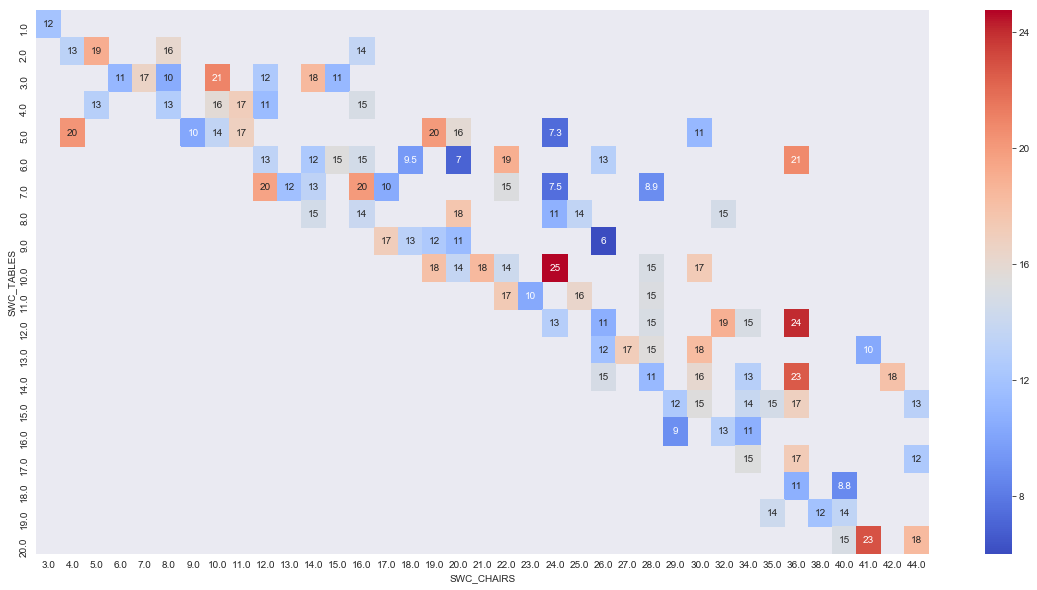

In [185]:
# visualizing the relationship between # of tables and chairs and grade received
plt.figure(figsize=(20,10))
sns.set_style("darkgrid")
# cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
sns.heatmap(tc, annot=True, cmap='coolwarm')

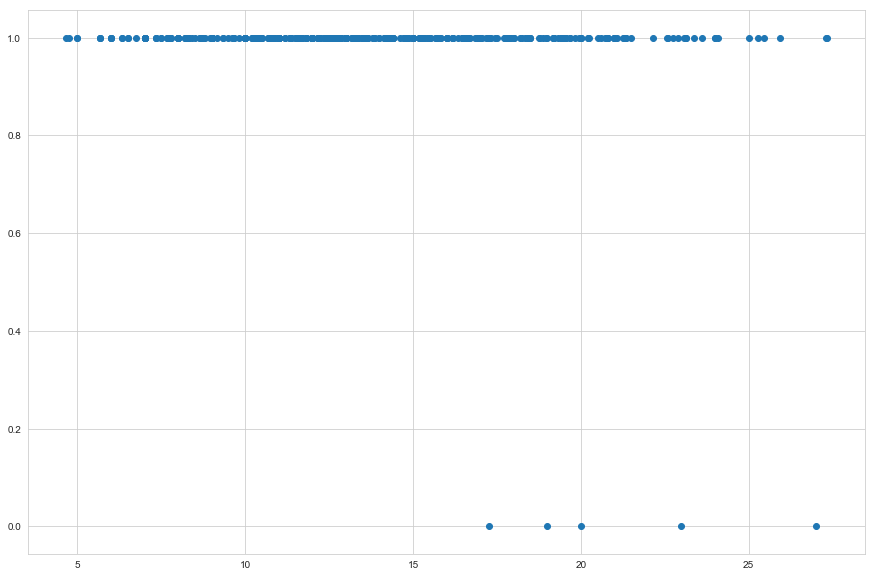

In [139]:
# plot SCORE vs. GRADE
sns.set_style('whitegrid')
plt.figure(figsize=(15,10))
plt.scatter(x=data.SCORE, y=data.GRADE)

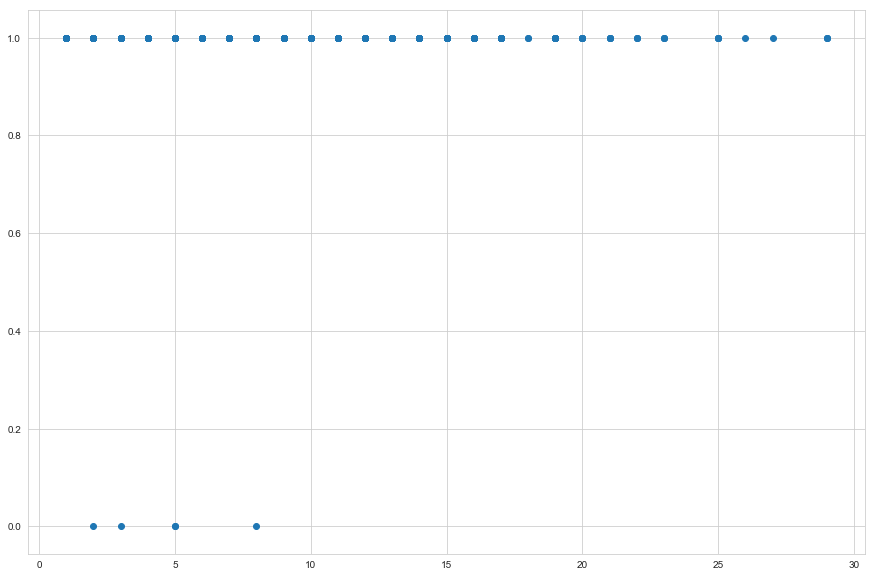

In [140]:
# plot Count of Critical Flags vs. Grade
sns.set_style('whitegrid')
plt.figure(figsize=(15,10))
plt.scatter(x=data.FLAG__Critical, y=data.GRADE)

In [144]:
# subset the data without dummy variables
raw = data.loc[:, 'DBA':'COMMUNITY_DISTRICT'].copy()

In [145]:
raw.head()

,DBA,BORO,FLAG__Critical,SCORE,GRADE,LIC_STATUS,SWC_SQ_FT,SWC_CHAIRS,COMMUNITY_DISTRICT
1,TIO PEPE,MANHATTAN,2,9.333333,1,Active,129.0,16.0,102.0
2,OLIVE TREE CAFE & COMEDY CELLAR,MANHATTAN,1,5.666667,1,Active,46.0,6.0,102.0
3,LA RIPAILLE RESTAURANT,MANHATTAN,8,13.600000,1,Active,129.0,11.0,102.0
4,THE MALT HOUSE,MANHATTAN,8,18.000000,1,Active,193.0,18.0,102.0
5,MOLLY WEE PUB,MANHATTAN,6,11.000000,1,Active,196.0,14.0,105.0


Text(0.5, 1.0, 'Locations of Restaurant Inspections')

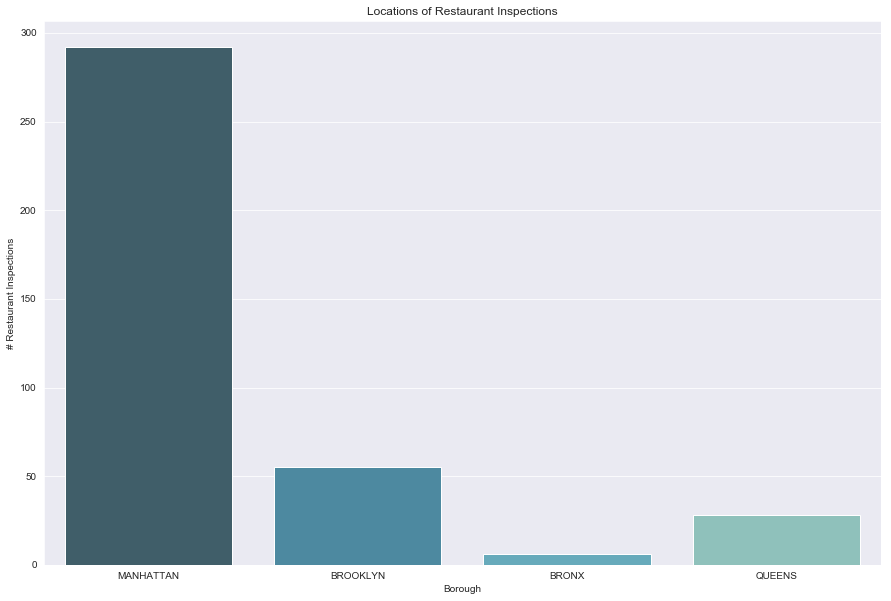

In [153]:
# visualize how many restaurant inspections are in each borough in the dataset
sns.set_style('darkgrid')
plt.figure(figsize=(15,10))
boro = sns.countplot(x = 'BORO', data = raw, palette = 'GnBu_d')
boro.set_xlabel('Borough')
boro.set_ylabel('# Restaurant Inspections')
boro.set_title('Locations of Restaurant Inspections')

Text(0.5, 1.0, 'Number of Critical Violations Per Borough')

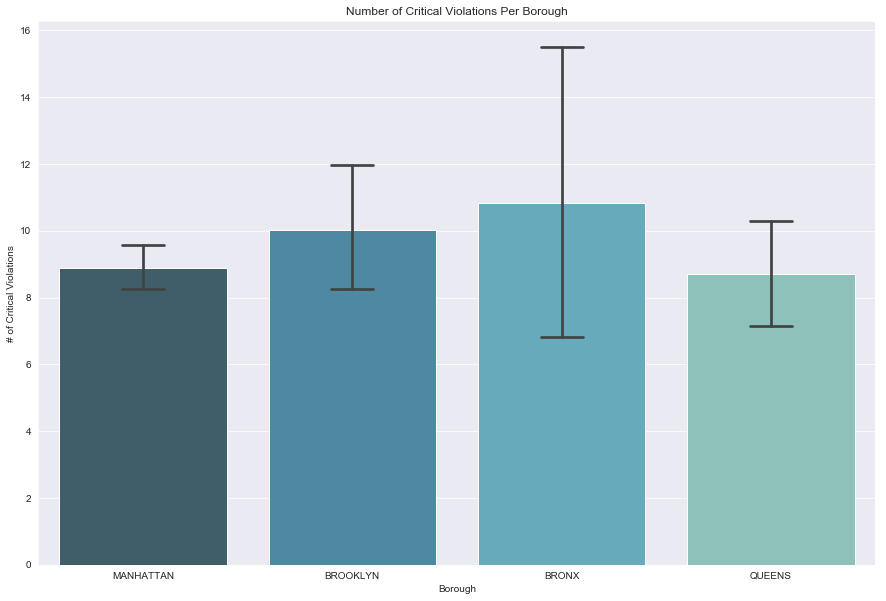

In [150]:
# visualize how many critical flags are in each borough in the dataset
sns.set_style('darkgrid')
plt.figure(figsize=(15,10))
flags = sns.barplot(x='BORO', y = 'FLAG__Critical', data = raw, palette = 'GnBu_d', capsize=0.2)
flags.set_xlabel('Borough')
flags.set_ylabel('# of Critical Violations')
flags.set_title('Number of Critical Violations Per Borough')

Text(0.5, 1.0, 'Size of Restaurants Per Borough')

<Figure size 1080x720 with 0 Axes>

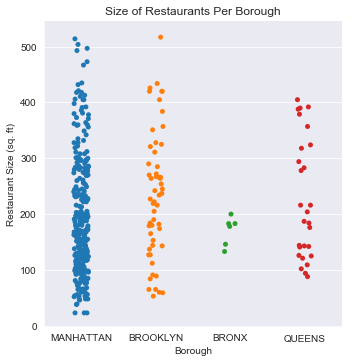

In [367]:
# visualize the sizes of restaurants in each borough in the dataset
sns.set_style('darkgrid')
plt.figure(figsize=(15,10))
sns.catplot(x='BORO', y = 'SWC_SQ_FT', data = raw)
plt.xlabel('Borough')
plt.ylabel('Restaurant Size (sq. ft)')
plt.title('Size of Restaurants Per Borough')

In [371]:
data.head()

,CAMIS,DBA,BORO,FLAG__Critical,SCORE,GRADE,LIC_STATUS,SWC_SQ_FT,SWC_CHAIRS,COMMUNITY_DISTRICT,...,ZIP_11249,ZIP_11366,ZIP_11368,ZIP_11375,ZIP_11421,ZIP_11432,BRONX,BROOKLYN,MANHATTAN,QUEENS
1,40366473,TIO PEPE,MANHATTAN,2,9.333333,1,Active,129.0,16.0,102.0,...,0,0,0,0,0,0,0,0,1,0
2,40370856,OLIVE TREE CAFE & COMEDY CELLAR,MANHATTAN,1,5.666667,1,Active,46.0,6.0,102.0,...,0,0,0,0,0,0,0,0,1,0
3,40372262,LA RIPAILLE RESTAURANT,MANHATTAN,8,13.600000,1,Active,129.0,11.0,102.0,...,0,0,0,0,0,0,0,0,1,0
4,40373912,THE MALT HOUSE,MANHATTAN,8,18.000000,1,Active,193.0,18.0,102.0,...,0,0,0,0,0,0,0,0,1,0
5,40374277,MOLLY WEE PUB,MANHATTAN,6,11.000000,1,Active,196.0,14.0,105.0,...,0,0,0,0,0,0,0,0,1,0


Text(0.5, 1.0, 'Restaurant Inspection Scores By Restaurant Size and Borough')

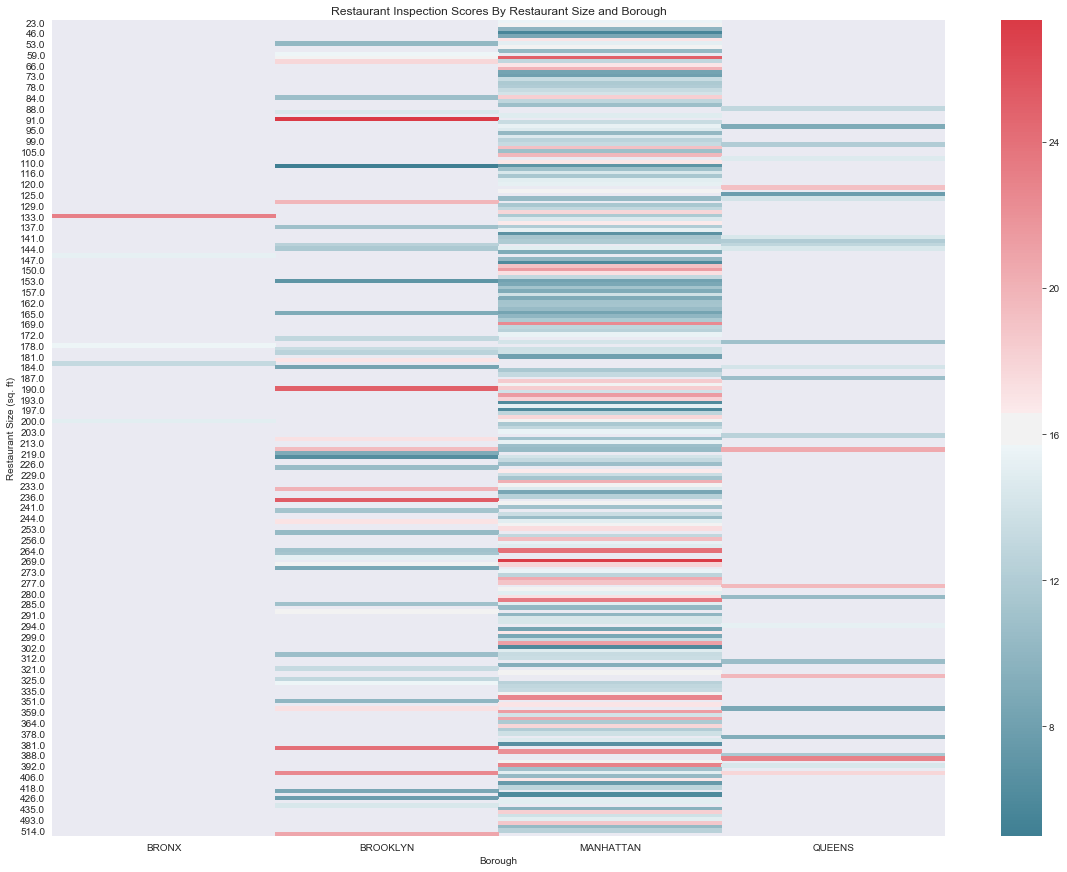

In [387]:
# create table for heatmap visualization (next step)
sb = data.pivot_table(index='SWC_SQ_FT', columns='BORO', values='SCORE') 

# visualizing the # of critical violations of each district and borough
plt.figure(figsize=(20,15))
sns.set_style("darkgrid")
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sb_heat = sns.heatmap(sb, cmap=cmap)
sb_heat.set_xlabel('Borough')
sb_heat.set_ylabel('Restaurant Size (sq. ft)')
sb_heat.set_title('Restaurant Inspection Scores By Restaurant Size and Borough')

In [388]:
# create table for heatmap visualization (next step)
sb = data.pivot_table(index='SWC_SQ_FT', columns='BORO', values='SCORE') 

# visualizing the # of critical violations of each district and borough
plt.figure(figsize=(20,15))
sns.set_style("darkgrid")
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sb_heat = sns.catplot(sb, cmap=cmap)
sb_heat.set_xlabel('Borough')
sb_heat.set_ylabel('Restaurant Size (sq. ft)')
sb_heat.set_title('Restaurant Inspection Scores By Restaurant Size and Borough')

TypeError: object of type 'NoneType' has no len()

<Figure size 1440x1080 with 0 Axes>

In [167]:
# create subset of just borough and grade 
grade_boro = raw.loc[:, ['BORO', 'GRADE']].groupby('BORO').agg({'GRADE': 'sum'}).reset_index().copy()

Text(0.5, 1.0, 'Number of Restaurants With An A Per Borough')

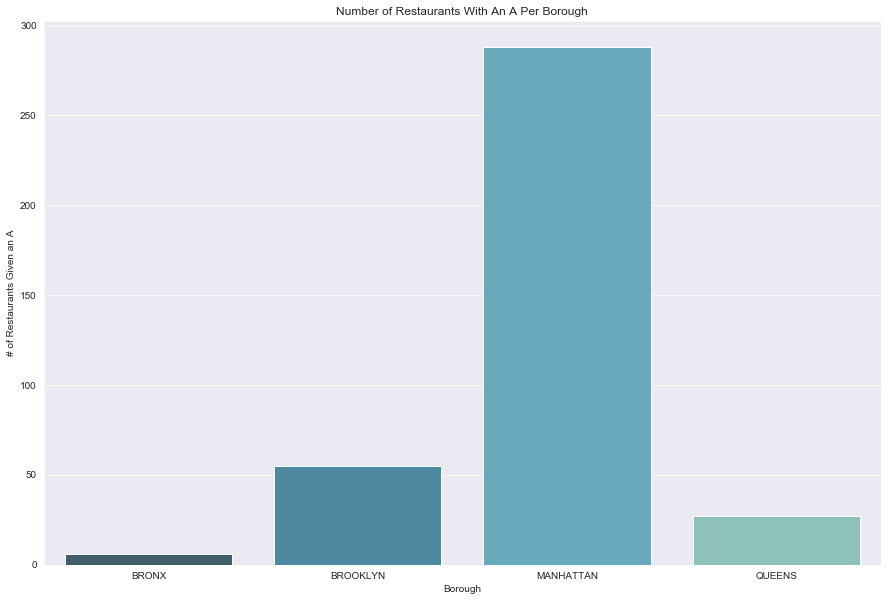

In [172]:
# visualize the count of restaurants that received A's in each borough in the dataset
sns.set_style('darkgrid')
plt.figure(figsize=(15,10))
sns.barplot(x='BORO', y = 'GRADE', data = grade_boro, palette='GnBu_d')
plt.xlabel('Borough')
plt.ylabel('# of Restaurants Given an A')
plt.title('Number of Restaurants With An A Per Borough')

In [177]:
# create subset of just community district and borough 
boro_district = raw.loc[:, ['BORO', 'COMMUNITY_DISTRICT']].copy()

In [187]:
# create table for heatmap visualization (next step)
bd = raw.pivot_table(index='BORO', columns='COMMUNITY_DISTRICT',values='FLAG__Critical') 

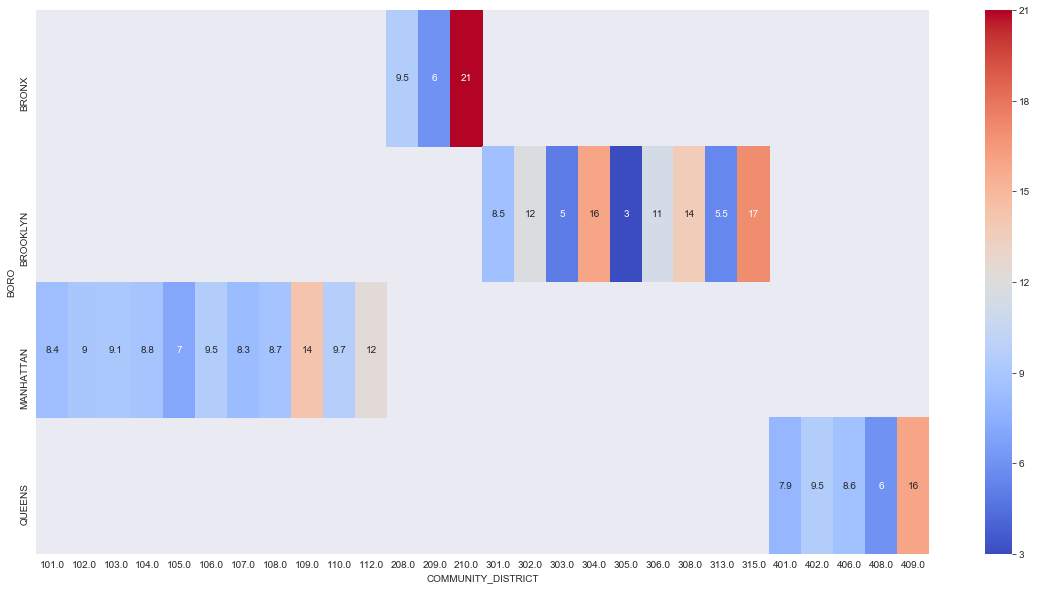

In [189]:
# visualizing the # of critical violations of each district and borough
plt.figure(figsize=(20,10))
sns.set_style("darkgrid")
# cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
sns.heatmap(bd, annot=True, cmap='coolwarm')

Text(0.5, 1.0, 'Community Districts in Each Borough')

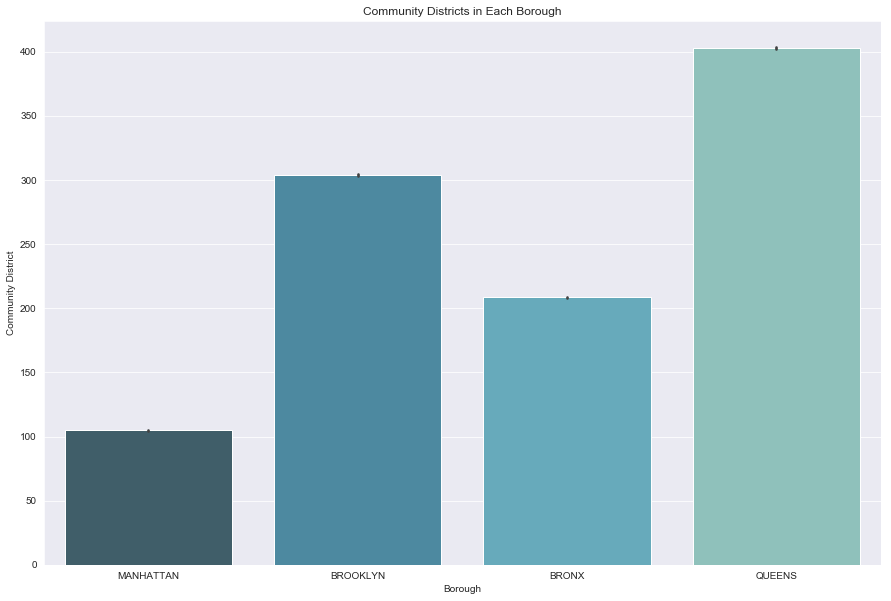

In [178]:
# visualize the community district and borough
sns.set_style('darkgrid')
plt.figure(figsize=(15,10))
sns.barplot(x='BORO', y='COMMUNITY_DISTRICT', data = boro_district, palette='GnBu_d')
plt.xlabel('Borough')
plt.ylabel('Community District')
plt.title('Community Districts in Each Borough')

In [191]:
# create subset of just community district and grade 
grade_district = raw.loc[:, ['COMMUNITY_DISTRICT', 'GRADE']].groupby('COMMUNITY_DISTRICT').agg({'GRADE': 'sum'}).reset_index().copy()

Text(0.5, 1.0, 'Number of Restaurants With An A Per Community District')

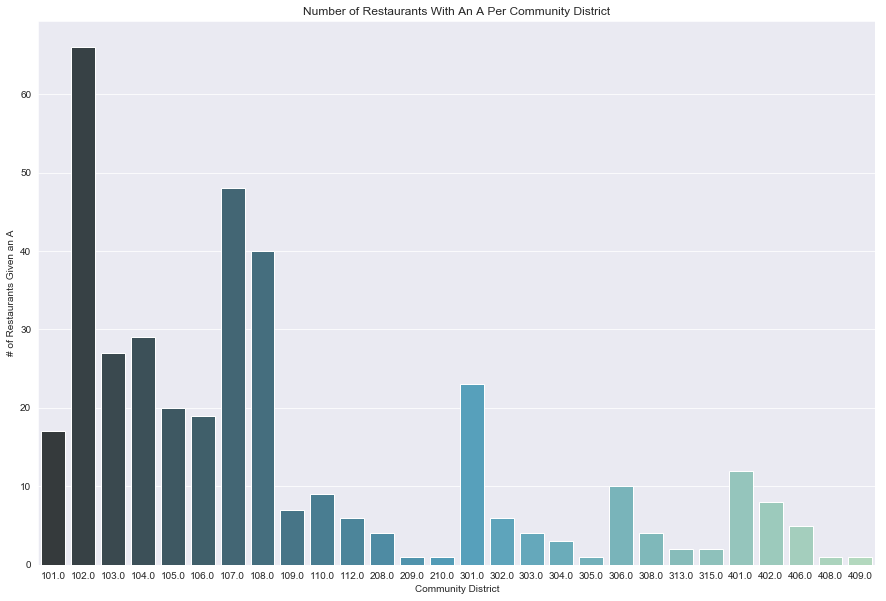

In [192]:
# visualize the count of restaurants that received A's in each community district in the dataset
sns.set_style('darkgrid')
plt.figure(figsize=(15,10))
sns.barplot(x='COMMUNITY_DISTRICT', y = 'GRADE', data = grade_district, palette='GnBu_d')
plt.xlabel('Community District')
plt.ylabel('# of Restaurants Given an A')
plt.title('Number of Restaurants With An A Per Community District')

# Feature Engineering & Selection

In [209]:
df.head()

,CAMIS,DBA,BORO,ZIPCODE,FLAG__Critical,FLAG__Not Critical,SCORE,GRADE,LIC_STATUS,SWC_SQ_FT,...,ZIP_11249,ZIP_11366,ZIP_11368,ZIP_11375,ZIP_11421,ZIP_11432,BRONX,BROOKLYN,MANHATTAN,QUEENS
0,40364958,WHITE HORSE TAVERN,MANHATTAN,10014,22,11,19.437500,1,Active,728.0,...,0,0,0,0,0,0,0,0,1,0
1,40366473,TIO PEPE,MANHATTAN,10014,2,5,9.333333,1,Active,129.0,...,0,0,0,0,0,0,0,0,1,0
2,40370856,OLIVE TREE CAFE & COMEDY CELLAR,MANHATTAN,10012,1,4,5.666667,1,Active,46.0,...,0,0,0,0,0,0,0,0,1,0
3,40372262,LA RIPAILLE RESTAURANT,MANHATTAN,10014,8,5,13.600000,1,Active,129.0,...,0,0,0,0,0,0,0,0,1,0
4,40373912,THE MALT HOUSE,MANHATTAN,10012,8,10,18.000000,1,Active,193.0,...,0,0,0,0,0,0,0,0,1,0


In [210]:
# drop unnecessary columns
df = df.drop(['CAMIS', 'DBA', 'BORO', 'ZIPCODE', 'LIC_STATUS', 'CITY_COUNCIL_DISTRICT'], axis=1)

In [211]:
df.columns

Index(['FLAG__Critical', 'FLAG__Not Critical', 'SCORE', 'GRADE', 'SWC_SQ_FT',
       'SWC_TABLES', 'SWC_CHAIRS', 'COMMUNITY_DISTRICT', 'ISSUANCE_DD',
       'YEAR_2011',
       ...
       'ZIP_11249', 'ZIP_11366', 'ZIP_11368', 'ZIP_11375', 'ZIP_11421',
       'ZIP_11432', 'BRONX', 'BROOKLYN', 'MANHATTAN', 'QUEENS'],
      dtype='object', length=117)

In [212]:
# convert Issuance Date to datetime object
df.ISSUANCE_DD = pd.to_datetime(df.ISSUANCE_DD)

In [223]:
# create function to calculate duration since business was open
def calc_duration(x):
    return datetime.datetime.today() - x

In [224]:
# create new column with duration open in days from today(5/9/19)
df['DURATION_OPEN'] = df.ISSUANCE_DD.apply(lambda x: calc_duration(x))

In [227]:
# split out the days duration
df['DAYS_OPEN'] = df.DURATION_OPEN.dt.days

In [229]:
# create dummy variables 
district_dummies = pd.get_dummies(df['COMMUNITY_DISTRICT'], prefix='DIST_')

In [230]:
# concat dummy df to main df
dist_df = pd.concat([df, district_dummies], axis=1)

In [232]:
# create dummy variables 
size_dummies = pd.get_dummies(df['SWC_SQ_FT'], prefix='SQFT_')

In [233]:
# concat dummy df to main df
size_df = pd.concat([dist_df, size_dummies], axis=1)

In [236]:
# create new df and drop categorical variables
df_dummy = size_df.drop(['SWC_SQ_FT', 'SWC_TABLES', 'SWC_CHAIRS', 'COMMUNITY_DISTRICT', 'ISSUANCE_DD'], axis=1).copy()

In [237]:
df_dummy.head()

,FLAG__Critical,FLAG__Not Critical,SCORE,GRADE,YEAR_2011,YEAR_2012,YEAR_2013,YEAR_2014,YEAR_2015,YEAR_2016,...,SQFT__645.0,SQFT__677.0,SQFT__688.0,SQFT__728.0,SQFT__752.0,SQFT__781.0,SQFT__793.0,SQFT__805.0,SQFT__817.0,SQFT__1253.0
0,22,11,19.437500,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,2,5,9.333333,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,4,5.666667,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,8,5,13.600000,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,8,10,18.000000,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [238]:
df_dummy.shape

(435, 416)

In [250]:
df_dummy.DAYS_OPEN = df_dummy.DAYS_OPEN.astype(int)

In [251]:
df_dummy.describe()

,FLAG__Critical,FLAG__Not Critical,SCORE,GRADE,YEAR_2011,YEAR_2012,YEAR_2013,YEAR_2014,YEAR_2015,YEAR_2016,...,SQFT__645.0,SQFT__677.0,SQFT__688.0,SQFT__728.0,SQFT__752.0,SQFT__781.0,SQFT__793.0,SQFT__805.0,SQFT__817.0,SQFT__1253.0
count,435.000000,435.000000,435.000000,435.000000,435.0,435.0,435.0,435.0,435.000000,435.000000,...,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000
mean,9.126437,7.291954,14.398551,0.974713,0.0,0.0,0.0,0.0,0.101149,0.687356,...,0.002299,0.002299,0.002299,0.002299,0.002299,0.002299,0.002299,0.002299,0.002299,0.002299
std,5.940963,4.287997,5.607098,0.157177,0.0,0.0,0.0,0.0,0.301874,0.464104,...,0.047946,0.047946,0.047946,0.047946,0.047946,0.047946,0.047946,0.047946,0.047946,0.047946
min,1.000000,0.000000,4.666667,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,4.000000,10.633333,1.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.000000,7.000000,13.469388,1.000000,0.0,0.0,0.0,0.0,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,13.000000,10.000000,17.291667,1.000000,0.0,0.0,0.0,0.0,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,34.000000,25.000000,42.000000,1.000000,0.0,0.0,0.0,0.0,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Decision Tree for Feature Selection

In [239]:
# Training a Decision Tree Model

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

In [257]:
# identify X and y
X = df_dummy.drop(['GRADE', 'YEAR_2019', 'SQFT__1253.0', 'MONTH_12', 'DIST__408.0', 'ZIP_11432', 'CUISINES', 'DURATION_OPEN'], axis=1).copy()
y = df_dummy.GRADE.copy()

In [258]:
# create training and testing datasets with 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [259]:
# Create an instance of DecisionTreeClassifier() called dtree
dtree = DecisionTreeClassifier()
dtree_select = dtree.fit(X_train, y_train)

In [260]:
# Calculate feature importances
importances = dtree_select.feature_importances_

In [272]:
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X.columns[i] for i in indices]

# print length of list
print('Length of Names List: ', len(names))

#list names
print(names[:200])

Length of Names List:  408
['SCORE', 'SQFT__277.0', 'SQFT__518.0', 'YEAR_2017', 'ZIP_10065', 'FLAG__Not Critical', 'MONTH_9', 'SQFT__144.0', 'DIST__102.0', 'SQFT__39.0', 'DIST__315.0', 'DIST__401.0', 'DIST__402.0', 'DIST__404.0', 'DIST__406.0', 'DIST__409.0', 'DIST__412.0', 'SQFT__23.0', 'SQFT__38.0', 'QUEENS', 'DIST__310.0', 'SQFT__46.0', 'SQFT__48.0', 'SQFT__52.0', 'SQFT__53.0', 'SQFT__54.0', 'SQFT__56.0', 'SQFT__59.0', 'SQFT__60.0', 'SQFT__65.0', 'DIST__313.0', 'DIST__308.0', 'DIST__103.0', 'DIST__208.0', 'DIST__101.0', 'DIST__104.0', 'DIST__105.0', 'DIST__106.0', 'DIST__107.0', 'DIST__108.0', 'DIST__109.0', 'DIST__110.0', 'DIST__112.0', 'DAYS_OPEN', 'DIST__307.0', 'DIST__209.0', 'DIST__210.0', 'DIST__301.0', 'DIST__302.0', 'DIST__303.0', 'DIST__304.0', 'SQFT__68.0', 'DIST__305.0', 'DIST__306.0', 'SQFT__66.0', 'SQFT__76.0', 'SQFT__72.0', 'SQFT__109.0', 'SQFT__112.0', 'SQFT__114.0', 'SQFT__116.0', 'SQFT__117.0', 'SQFT__118.0', 'SQFT__120.0', 'SQFT__121.0', 'SQFT__124.0', 'SQFT__125.0

# Model

### Import Libraries

In [287]:
# import libraries
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix, accuracy_score
import pickle

In [275]:
# define function to pick model after it is fit
def pickle_model(model_name, model):
    model_pickle_path = 'EDA2_{}.pkl'.format(model_name)
    model_pickle = open(model_pickle_path, 'wb')
    pickle.dump(model, model_pickle)
    model_pickle.close()

### Train Test Split

In [293]:
# create list of features
features = df_dummy[['SCORE', 'SQFT__277.0', 'SQFT__518.0', 'YEAR_2017', 'ZIP_10065', 'FLAG__Not Critical', 'MONTH_9', 'SQFT__144.0', 'DIST__102.0', 'SQFT__39.0', 'DIST__315.0', 'DIST__401.0', 'DIST__402.0', 'DIST__404.0', 'DIST__406.0', 'DIST__409.0', 'DIST__412.0', 'SQFT__23.0', 'SQFT__38.0', 'QUEENS', 'DIST__310.0', 'SQFT__46.0', 'SQFT__48.0', 'SQFT__52.0', 'SQFT__53.0', 'SQFT__54.0', 'SQFT__56.0', 'SQFT__59.0', 'SQFT__60.0', 'SQFT__65.0', 'DIST__313.0', 'DIST__308.0', 'DIST__103.0', 'DIST__208.0', 'DIST__101.0', 'DIST__104.0', 'DIST__105.0', 'DIST__106.0', 'DIST__107.0', 'DIST__108.0', 'DIST__109.0', 'DIST__110.0', 'DIST__112.0', 'DAYS_OPEN', 'DIST__307.0', 'DIST__209.0', 'DIST__210.0', 'DIST__301.0', 'DIST__302.0', 'DIST__303.0', 'DIST__304.0', 'SQFT__68.0', 'DIST__305.0', 'DIST__306.0', 'SQFT__66.0', 'SQFT__76.0', 'SQFT__72.0', 'SQFT__109.0', 'SQFT__112.0', 'SQFT__114.0', 'SQFT__116.0', 'SQFT__117.0', 'SQFT__118.0', 'SQFT__120.0', 'SQFT__121.0', 'SQFT__124.0', 'SQFT__125.0', 'SQFT__126.0', 'SQFT__127.0', 'SQFT__129.0', 'SQFT__130.0', 'SQFT__131.0', 'SQFT__133.0', 'SQFT__134.0', 'SQFT__136.0', 'SQFT__137.0', 'SQFT__138.0', 'SQFT__139.0', 'SQFT__141.0', 'SQFT__110.0', 'SQFT__106.0', 'SQFT__73.0', 'SQFT__105.0', 'BROOKLYN', 'SQFT__77.0', 'SQFT__78.0', 'SQFT__80.0', 'SQFT__81.0', 'SQFT__84.0', 'SQFT__85.0', 'SQFT__87.0', 'SQFT__88.0', 'SQFT__89.0', 'SQFT__90.0', 'SQFT__91.0', 'SQFT__92.0', 'SQFT__94.0', 'SQFT__95.0', 'SQFT__96.0', 'SQFT__98.0', 'SQFT__99.0', 'SQFT__101.0', 'SQFT__102.0', 'SQFT__103.0', 'MANHATTAN', 'ZIP_11368', 'BRONX', 'Beverages', 'Delis', 'European', 'Healthy', 'Kosher', 'Latin', 'Middle_Eastern', 'ZIP_10001', 'ZIP_10002', 'ZIP_10003', 'ZIP_10006', 'ZIP_10007', 'ZIP_10009', 'ZIP_10010', 'ZIP_10011', 'ZIP_10012', 'ZIP_10013', 'ZIP_10014', 'ZIP_10016', 'ZIP_10017', 'ZIP_10019', 'ZIP_10021', 'Cold Desserts', 'Bakeries', 'ZIP_10023', 'Australian', 'YEAR_2011', 'YEAR_2012', 'YEAR_2013', 'YEAR_2014', 'YEAR_2015', 'YEAR_2016', 'YEAR_2018', 'MONTH_1', 'MONTH_2', 'MONTH_3', 'MONTH_4', 'MONTH_5', 'MONTH_6', 'MONTH_7', 'MONTH_8', 'MONTH_10', 'MONTH_11', 'African', 'American', 'Asia Pacific', 'Asian', 'ZIP_10022', 'ZIP_10024', 'ZIP_11421', 'ZIP_11201', 'ZIP_11206', 'ZIP_11208', 'ZIP_11209', 'ZIP_11211', 'ZIP_11213', 'ZIP_11215', 'ZIP_11216', 'ZIP_11217', 'ZIP_11218', 'ZIP_11221', 'ZIP_11222', 'ZIP_11224', 'ZIP_11229', 'ZIP_11231', 'ZIP_11235', 'ZIP_11237', 'ZIP_11238', 'ZIP_11249', 'ZIP_11366', 'SQFT__143.0', 'ZIP_11375', 'ZIP_11205', 'ZIP_11109', 'ZIP_10025', 'ZIP_11106', 'ZIP_10026', 'ZIP_10027', 'ZIP_10028', 'ZIP_10031', 'ZIP_10032', 'ZIP_10034', 'ZIP_10036', 'ZIP_10038', 'ZIP_10040', 'ZIP_10075', 'ZIP_10128', 'ZIP_10282', 'ZIP_10461', 'ZIP_10462', 'ZIP_10463', 'ZIP_10471', 'ZIP_11101']].copy()

In [294]:
# identify X and y
X = features
y = df_dummy.GRADE

In [295]:
# create training and testing datasets with 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Scaling the Data

In [296]:
# instantiate the scaler and fit to train data
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [297]:
#Use the .transform() method to transform the features to a scaled version.
scaled_features = scaler.transform(X_train)
data_feat = pd.DataFrame(scaled_features,columns=X.columns)
data_feat.head()

,SCORE,SQFT__277.0,SQFT__518.0,YEAR_2017,ZIP_10065,FLAG__Not Critical,MONTH_9,SQFT__144.0,DIST__102.0,SQFT__39.0,...,ZIP_10038,ZIP_10040,ZIP_10075,ZIP_10128,ZIP_10282,ZIP_10461,ZIP_10462,ZIP_10463,ZIP_10471,ZIP_11101
0,0.099214,-0.053683,-0.053683,0.447214,-0.162938,-0.554524,-0.639458,-0.09325,-0.474713,-0.053683,...,-0.053683,-0.076029,-0.143275,-0.143275,-0.053683,-0.053683,-0.076029,-0.09325,18.627936,-0.107833
1,-0.165721,-0.053683,-0.053683,0.447214,-0.162938,-0.322584,-0.639458,-0.09325,-0.474713,-0.053683,...,-0.053683,-0.076029,-0.143275,-0.143275,-0.053683,-0.053683,-0.076029,-0.09325,-0.053683,-0.107833
2,0.876355,-0.053683,-0.053683,0.447214,-0.162938,0.373237,-0.639458,-0.09325,-0.474713,-0.053683,...,-0.053683,-0.076029,-0.143275,-0.143275,-0.053683,-0.053683,-0.076029,-0.09325,-0.053683,-0.107833
3,-0.254033,-0.053683,-0.053683,0.447214,-0.162938,-0.786464,-0.639458,-0.09325,-0.474713,-0.053683,...,-0.053683,-0.076029,-0.143275,-0.143275,-0.053683,-0.053683,-0.076029,-0.09325,-0.053683,-0.107833
4,1.203108,-0.053683,-0.053683,0.447214,-0.162938,-0.322584,-0.639458,-0.09325,2.106537,-0.053683,...,-0.053683,-0.076029,-0.143275,-0.143275,-0.053683,-0.053683,-0.076029,-0.09325,-0.053683,-0.107833


### Fixing Class Imbalance - SMOTE

In [298]:
# create a SMOTE instance and fit to the training dataset
sm = SMOTE(random_state=23, ratio=1.0)
X_train, y_train = sm.fit_sample(X_train, y_train)

In [299]:
# review the len of train dataset:
print(len(X_train))
print(len(y_train))

680
680


### Models

#### Logistic Regression

In [303]:
# create a Logistic Regression instance
smote_lr = LogisticRegression(solver='liblinear')

In [310]:
# fit logistic regression model to training data
smote_lr = smote_lr.fit(X_train, y_train)

In [311]:
smote_lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [312]:
# use model to predict off training data
smote_pred_train = smote_lr.predict(X_train)

In [313]:
print(confusion_matrix(y_train, smote_pred_train))
print(classification_report(y_train, smote_pred_train))

[[340   0]
 [  3 337]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       340
           1       1.00      0.99      1.00       340

   micro avg       1.00      1.00      1.00       680
   macro avg       1.00      1.00      1.00       680
weighted avg       1.00      1.00      1.00       680



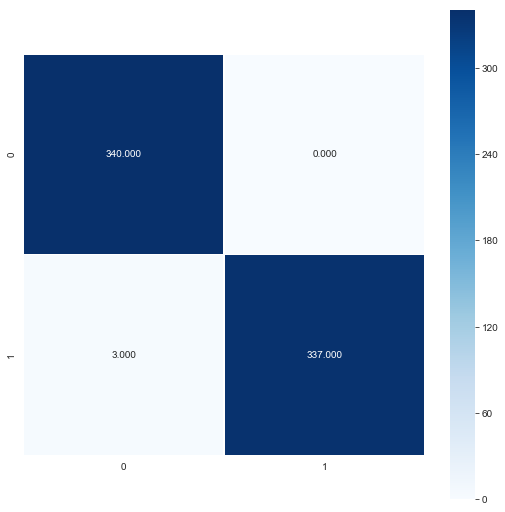

In [314]:
#confusion matrix visualization of train data
cm_lr = confusion_matrix(y_train, smote_pred_train)

plt.figure(figsize = (9, 9))
sns.heatmap(cm_lr, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = plt.cm.Blues)

In [315]:
#Predictions and Evaluations
smote_pred_test = smote_lr.predict(X_test)
print(classification_report(y_test, smote_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.98      1.00      0.99        84

   micro avg       0.98      0.98      0.98        87
   macro avg       0.99      0.67      0.74        87
weighted avg       0.98      0.98      0.97        87



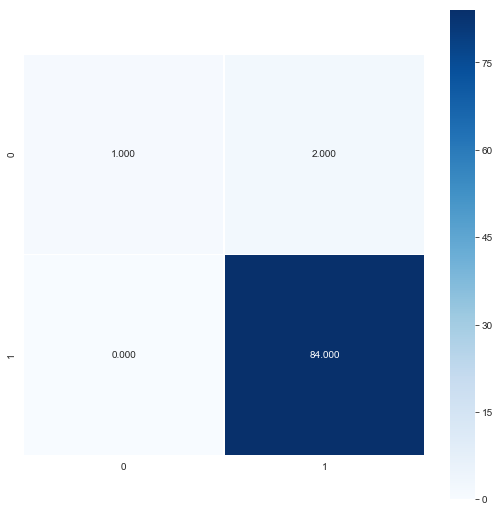

In [316]:
#confusion matrix visualization of test data
cm_lr = confusion_matrix(y_test, smote_pred_test)

plt.figure(figsize = (9, 9))
sns.heatmap(cm_lr, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = plt.cm.Blues)

In [317]:
# Model F1 Scores Comparison
print('Training F1 Score:', f1_score(y_train, smote_pred_train))
print('Testing F1 Score:', f1_score(y_test, smote_pred_test))

Training F1 Score: 0.9955686853766618
Testing F1 Score: 0.988235294117647


In [320]:
# pickling model
# pickle_model('smote_log', smote_lr)

In [322]:
# open pickled model and set to a variable
smote_lr_pkl = open('./EDA2_smote_log.pkl', 'rb')
log_smote = pickle.load(smote_lr_pkl)

In [323]:
# print pickled model info
print("Loaded Log Reg Pickle :: ", log_smote)

Loaded Log Reg Pickle ::  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)


#### Decision Tree Model 2

In [355]:
# create a Decision Tree instance
smote_dt2 = DecisionTreeClassifier()

In [356]:
# fit the model to the training data
smote_dtree2 = smote_dt2.fit(X_train, y_train)

In [357]:
# use model to predict off training data
smote_dt_pred_train2 = smote_dtree2.predict(X_train)

In [358]:
print(confusion_matrix(y_train, smote_dt_pred_train2))
print(classification_report(y_train, smote_dt_pred_train2))

[[340   0]
 [  0 340]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       340
           1       1.00      1.00      1.00       340

   micro avg       1.00      1.00      1.00       680
   macro avg       1.00      1.00      1.00       680
weighted avg       1.00      1.00      1.00       680



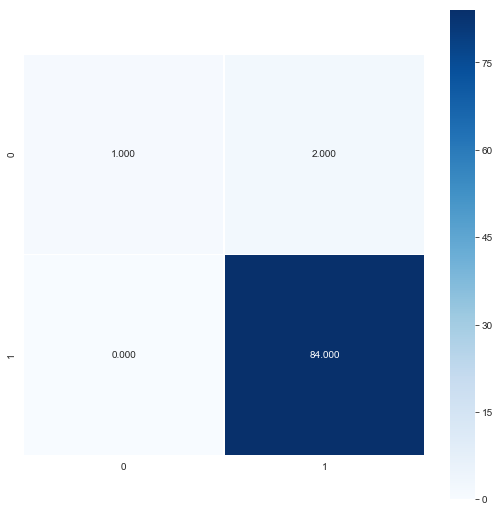

In [359]:
#confusion matrix visualization of train data
cm_dt2 = confusion_matrix(y_train, smote_dt_pred_train2)

plt.figure(figsize = (9, 9))
sns.heatmap(cm_lr, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = plt.cm.Blues)

In [361]:
# use model to predict off test data
smote_dt_pred_test2 = smote_dtree2.predict(X_test)

In [362]:
print(confusion_matrix(y_test, smote_dt_pred_test2))
print(classification_report(y_test, smote_dt_pred_test2))

[[ 1  2]
 [ 1 83]]
              precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       0.98      0.99      0.98        84

   micro avg       0.97      0.97      0.97        87
   macro avg       0.74      0.66      0.69        87
weighted avg       0.96      0.97      0.96        87



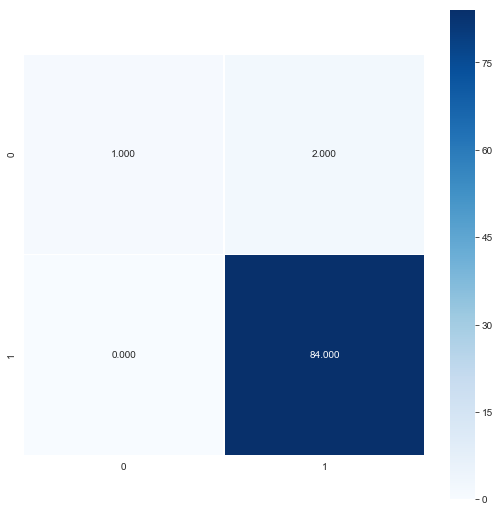

In [363]:
#confusion matrix visualization of train data
cm_dt2 = confusion_matrix(y_test, smote_dt_pred_test2)

plt.figure(figsize = (9, 9))
sns.heatmap(cm_lr, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = plt.cm.Blues)

In [364]:
# Model F1 Scores Comparison
print('Training F1 Score:', f1_score(y_train, smote_dt_pred_train2))
print('Testing F1 Score:', f1_score(y_test, smote_dt_pred_test2))

Training F1 Score: 1.0
Testing F1 Score: 0.9822485207100591


In [337]:
# pickling model
pickle_model('smote_dt', smote_dtree)

In [340]:
# open pickled model and set to a variable
dtree_smote_pkl = open('./EDA2_smote_dt.pkl', 'rb')
dtree_smote = pickle.load(dtree_smote_pkl)

In [341]:
# print pickled model info
print("Loaded Decision Tree Pickle :: ", dtree_smote)

Loaded Decision Tree Pickle ::  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


#### Decision Tree Model 1

In [326]:
# create a Decision Tree instance
smote_dt = DecisionTreeClassifier(max_depth=5)

In [327]:
# fit the model to the training data
smote_dtree = smote_dt.fit(X_train, y_train)

In [328]:
# fit the model to the training data
smote_dtree = smote_dt.fit(X_train, y_train)

In [329]:
# use model to predict off training data
smote_dt_pred_train = smote_dtree.predict(X_train)

In [330]:
print(confusion_matrix(y_train, smote_dt_pred_train))
print(classification_report(y_train, smote_dt_pred_train))

[[340   0]
 [  0 340]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       340
           1       1.00      1.00      1.00       340

   micro avg       1.00      1.00      1.00       680
   macro avg       1.00      1.00      1.00       680
weighted avg       1.00      1.00      1.00       680



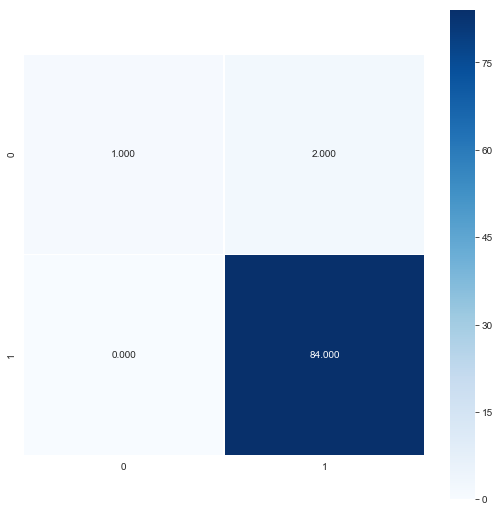

In [331]:
#confusion matrix visualization of train data
cm_dt = confusion_matrix(y_train, smote_dt_pred_train)

plt.figure(figsize = (9, 9))
sns.heatmap(cm_lr, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = plt.cm.Blues)

In [332]:
# use model to predict off test data
smote_dt_pred_test = smote_dtree.predict(X_test)

In [335]:
print(confusion_matrix(y_test, smote_dt_pred_test))
print(classification_report(y_test, smote_dt_pred_test))

[[ 1  2]
 [ 1 83]]
              precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       0.98      0.99      0.98        84

   micro avg       0.97      0.97      0.97        87
   macro avg       0.74      0.66      0.69        87
weighted avg       0.96      0.97      0.96        87



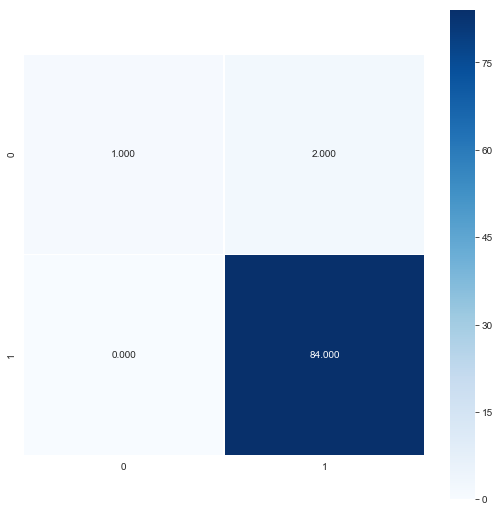

In [336]:
#confusion matrix visualization of train data
cm_dt = confusion_matrix(y_test, smote_dt_pred_test)

plt.figure(figsize = (9, 9))
sns.heatmap(cm_lr, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = plt.cm.Blues)

In [343]:
# Model F1 Scores Comparison
print('Training F1 Score:', f1_score(y_train, smote_dt_pred_train))
print('Testing F1 Score:', f1_score(y_test, smote_dt_pred_test))

Training F1 Score: 1.0
Testing F1 Score: 0.9822485207100591


In [337]:
# pickling model
pickle_model('smote_dt', smote_dtree)

In [340]:
# open pickled model and set to a variable
dtree_smote_pkl = open('./EDA2_smote_dt.pkl', 'rb')
dtree_smote = pickle.load(dtree_smote_pkl)

In [341]:
# print pickled model info
print("Loaded Decision Tree Pickle :: ", dtree_smote)

Loaded Decision Tree Pickle ::  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


#### KNN

In [344]:
# instantiate KNN model
knn = KNeighborsClassifier()

In [345]:
# Fit this KNN model to the training data.
smote_knn = knn.fit(X_train, y_train)

In [346]:
# predict on training data
smote_knn_pred_train = smote_knn.predict(X_train)

In [347]:
print(confusion_matrix(y_train, smote_knn_pred_train))
print(classification_report(y_train, smote_knn_pred_train))

[[333   7]
 [ 29 311]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       340
           1       0.98      0.91      0.95       340

   micro avg       0.95      0.95      0.95       680
   macro avg       0.95      0.95      0.95       680
weighted avg       0.95      0.95      0.95       680



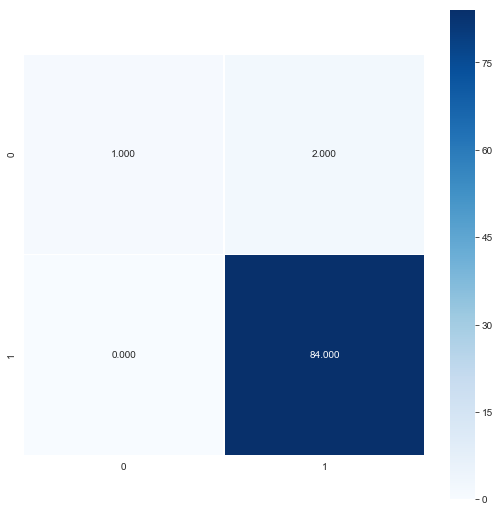

In [348]:
#confusion matrix visualization of train data
cm_knn = confusion_matrix(y_train, smote_knn_pred_train)

plt.figure(figsize = (9, 9))
sns.heatmap(cm_lr, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = plt.cm.Blues)

In [349]:
#Predictions and Evaluations

smote_knn_pred_test = smote_knn.predict(X_test)
print(confusion_matrix(y_test, smote_knn_pred_test))
print(classification_report(y_test, smote_knn_pred_test))

[[ 2  1]
 [ 9 75]]
              precision    recall  f1-score   support

           0       0.18      0.67      0.29         3
           1       0.99      0.89      0.94        84

   micro avg       0.89      0.89      0.89        87
   macro avg       0.58      0.78      0.61        87
weighted avg       0.96      0.89      0.92        87



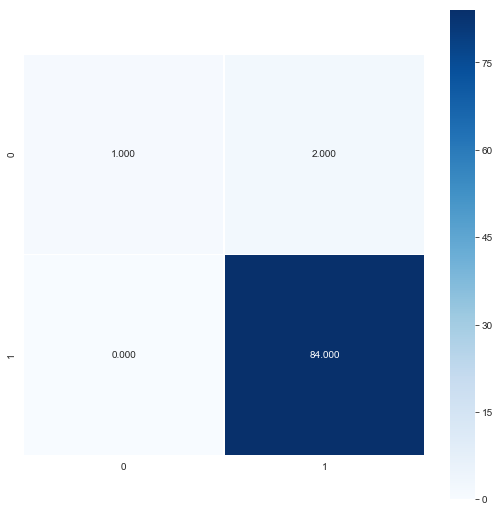

In [350]:
#confusion matrix visualization of train data
cm_knn = confusion_matrix(y_test, smote_knn_pred_test)

plt.figure(figsize = (9, 9))
sns.heatmap(cm_lr, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = plt.cm.Blues)

In [351]:
# Model F1 Score Comparison
print('Training F1 Score:', f1_score(y_train, smote_knn_pred_train))
print('Testing F1 Score:', f1_score(y_test, smote_knn_pred_test))

Training F1 Score: 0.9452887537993921
Testing F1 Score: 0.9375


In [352]:
# pickling model
pickle_model('knn_smote', smote_knn)

In [353]:
# open pickled model and set to a variable
smote_knn_pkl = open('./EDA2_knn_smote.pkl', 'rb')
knn_smote = pickle.load(smote_knn_pkl)

In [354]:
# print pickled model info
print("Loaded KNN Pickle :: ", knn_smote)

Loaded KNN Pickle ::  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')
